In [1]:
from __future__ import print_function

%matplotlib inline
%precision 16

import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 1:  Review

## Question 1

**(a)** [20] Show how to derive analytically the backward finite difference approximation to the 1st derivative that is 2nd order accurate assuming a stencil that has equal width between the stencil points.  You can use the numerical method introduced in the lecture notes to check your work but you must show how to derive the coefficients analytically as well (you can use the procedure the function is based on).  Also make sure to explicitly find the leading order form of the truncation error $\tau$.

### Solution:

For backward, we have that:

$$ f'(x) \approx P'_2(x) = [y_1,y_0] + ((x - x_1)+(x-x_2))[y_2,y_1,y_0] \\ = \frac{y_0-y_1}{x_0-x_1} + ((x-x_2)+(x-x_1))(\frac{y_0 - y_1}{(x_0 - x_1)(x_0 - x_2)} - \frac{y_1 - y_2}{(x_1 - x_2)(x_0 - x_2)}) \\ = \frac{f(x_0)-f(x_1)}{x_0-x_1} + (2x-x_1-x_2) \left (\frac{f(x_0)-f(x_1)}{(x_0-x_1)2\Delta x} - \frac{f(x_1)-f(x_2)}{(x_1-x_2)2\Delta x} \right ) \\ \fbox{$f'(x_2) = \frac{f(x_0)-4f(x_1)+3f(x_2)}{2\Delta x}$} $$

To find our truncation error, we can expand it using Taylor Series:

$$f'(x_2) + R(x) = f'(x_2) + \frac{3}{4} \Delta x f''(x_2) + \mathcal{O}(\Delta x^2)$$

Therefore: $R(x)= \frac{3}{4} \Delta x f''(x_2) + \mathcal{O}(\Delta x^2)$

**(b)** [15] Write a function that computes this 1st derivative of an arbitrary function $f(x)$ using the backward difference approximation you used above.  The function should accept a set of points `x` to evaluate the 1st derivative at and the function `f`.  For the first points in `x` use the forward difference approximation that mirrors the one you just found (see the lecture notes).

In [2]:
def compute_prime(x, f):
    """Compute the first derivative"""
    # YOUR CODE HERE
    
    N = 150
    
    #Partitioning the x's
    x_hat = numpy.linspace(x[0], x[-1], N) 
    
    #Difference between the partitioned intervals
    dx = x_hat[1] - x_hat[0]
    
    f_prime = numpy.empty(x_hat.shape)

    #Looping over to find the derivatives using 2nd-order accuracy as noted above
    for i in range(2,150):
        f_prime[i] = (f(x_hat[i-2]) - 4*f(x_hat[i-1]) + 3*f(x_hat[i]))/(2*dx)

    #These ones we have to find manually
    f_prime[0] =  (-3.0 * f(x_hat[0])  +  4.0 * f(x_hat[1])  - f(x_hat[2]))  / (2.0 * dx)
    f_prime[1] =  (-3.0 * f(x_hat[1])  +  4.0 * f(x_hat[2])  - f(x_hat[3]))  / (2.0 * dx)
    f_prime[-1] = ( 3.0 * f(x_hat[-1]) + -4.0 * f(x_hat[-2]) +   f(x_hat[-3])) / (2.0 * dx)
    
    return f_prime

In [3]:
f = lambda x: x**3 / numpy.sin(x)
f_prime = lambda x: -x**3 * numpy.cos(x) / numpy.sin(x)**2 + 3.0 * x**2 / numpy.sin(x)
x = numpy.linspace(0.25, 0.5 * numpy.pi, 150)
numpy.testing.assert_allclose(compute_prime(x, f), f_prime(x), atol=1e-3)
print("Success!")

Success!


**(c)** [15] Using your function above plot the derivative of the function and error convergence behavior for the functions.  
$$
    f(x) = \frac{x^3}{\sin x}, \quad \quad g(x) = |x - 3/2|, \quad \text{and} \quad h(x) = \left \{ \begin{aligned} 0 & & x < 3/2 \\ 1 & & x \ge 3/2 \end{aligned} \right .
$$
on the interval $x \in [1, 2]$.  Explain the behavior you see.

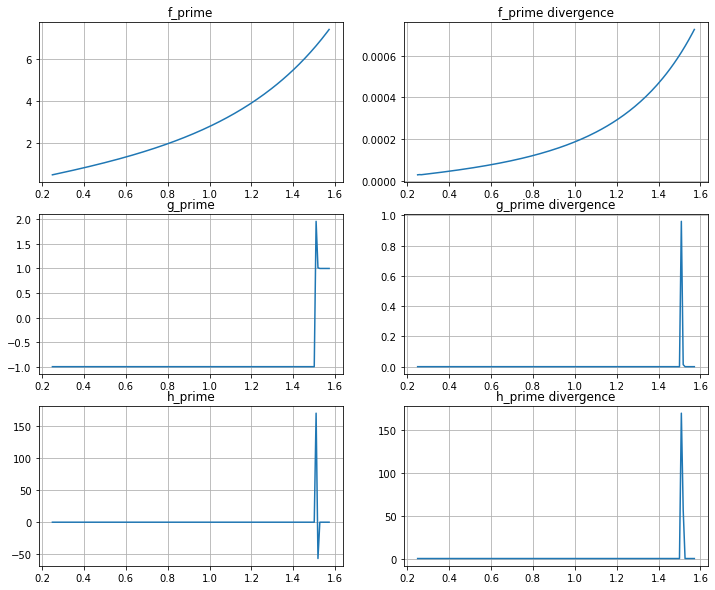

In [4]:
#f(x)
f = lambda x: x**3 / numpy.sin(x)
    
#g(x)
g = lambda x: numpy.abs(x - 3/2)
    
def h(x):
    hx = numpy.empty(x.shape)
    hx[x < 3/2] = 0 
    hx[x >= 3/2]= 1
    return hx
    
x = numpy.linspace(0.25, 0.5 * numpy.pi, 150)
    
##Calcuate derivatives
f_prime = lambda x: -x**3 * numpy.cos(x) / numpy.sin(x)**2 + 3.0 * x**2 / numpy.sin(x)
g_prime = lambda x: (x - 3/2) / numpy.abs(x-3/2)

plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 1)
plt.title("f_prime")
plt.plot(x, compute_prime(x, f))
plt.grid()
    
plt.subplot(3, 2, 2)
plt.title("f_prime divergence")
plt.plot(x, numpy.sqrt((compute_prime(x, f) - f_prime(x))**2))
plt.grid()
    
plt.subplot(3, 2, 3)
plt.title("g_prime")
plt.plot(x, compute_prime(x, g))
plt.grid()
    
plt.subplot(3, 2, 4)
plt.title("g_prime divergence")
plt.plot(x, numpy.sqrt((compute_prime(x, g) - g_prime(x))**2))
plt.grid()
    
plt.subplot(3, 2, 5)
plt.title("h_prime")
plt.plot(x, compute_prime(x, h))
plt.grid()
    
plt.subplot(3, 2, 6)
plt.title("h_prime divergence")
plt.plot(x, numpy.abs(compute_prime(x, h)))
plt.grid() 

The "jumps" we see in the graph are due to non-differentiabilty at that point. The more "severe" the non-differentiability, the more of a jump we will see.

## Question 2
Solving the following PDEs showing the relevant steps and plot a few time snapshots of the solution.

**(a)** [15] $u_t = \kappa u_{xx}$ with $x \in \Omega = (0, L)$, the boundary conditions $u(0, t)_x = 0$ and $u_x(L, t) = 0$, and the initial condition $u(x, 0) = 2 - \cos\left(\frac{\pi x}{L} \right) + 3 \cos\left(\frac{3 \pi x}{L} \right)$.  When plotting the solution pick a value for $L$ and play with values of $\kappa$.  Make sure your solution makes sense as $t \rightarrow \infty$.

### Solution:

Using separation of variables, we will have that: $u(x,t) = \phi(x)G(t)$, and rewriting gives us:
$$
\phi(x)G_t = \phi_{xx}G(t)
$$

Introducing the separation constant $\lambda$, we will get:

$$\frac{1}{kG}G_t = \frac{1}{\phi}\phi_{xx} = -\lambda$$ <br> 
$$\implies \phi_{xx}=-\lambda\phi, G_t = -\lambda kG$$

The general solution to $G_t = -\lambda kG$ is $G(t) = ce^{-\lambda kt}$

For $\phi_{xx}=-\lambda\phi$, the auxiliary polynomial is $r^2 + \lambda = 0 \implies r=\pm \sqrt{\lambda}$ so our general solution is: <br>

$$\phi(x) = c_1 \cos(\sqrt{\lambda}x) + c_2 \sin(\sqrt{\lambda}x)$$
$$\implies \phi'(x)=\sqrt{\lambda}(-c_1 \sin(\sqrt{\lambda}x) + c_2 \cos(\sqrt{\lambda}x))$$

From our BC $u(0,t)_x=0$, we get that $c_2=0$ since we are assuming $\lambda > 0$. For $u_x(L,t)=0$, we get:

$$0 = -c_1 \sqrt{\lambda}\sin(\sqrt{\lambda}L)$$ and we assume $c_1 \neq 0$ to avoid a trivial solution, and we get that: <br>

$$\sin(\sqrt{\lambda}L)=0 \implies \sqrt{\lambda}L=n\pi \implies \lambda = (\frac{n\pi}{L})^2,n=1,2,3,4,\cdots$$

Which gives us the solution for the spatial ODE:
$$\phi(x) = c_1 \cos\left(\frac{n\pi x}{L} \right)$$

Combining yields:
$$u(x,t) = A_0 + \sum_{n=1}^{\infty} A_n \cos\left(\frac{n\pi x}{L} \right) e^{-\left(\frac{n\pi}{L}\right)^2kt}$$

where:
$$A_0 = \frac{1}{L}\int_{0}^{L}f(x)dx$$
$$A_n = \frac{2}{L}\int_{0}^{L}f(x)\cos(\frac{n\pi x}{L})dx$$

via orthogonality.

The initial conditions is satisfied when:
$$2 - \cos\left(\frac{\pi x}{L} \right) + 3 \cos\left(\frac{3 \pi x}{L} \right)=\sum_{n=0}^{\infty}A_n \cos(\frac{n\pi x}{L})$$

where:
$$A_0 = \frac{1}{L}\int_{0}^{L} 2 - \cos\left(\frac{\pi x}{L} \right) + 3 \cos\left(\frac{3 \pi x}{L} \right)dx=2$$
$$A_n = \frac{2}{L}\int_{0}^{L} \left(2 - \cos\left(\frac{\pi x}{L} \right) + 3 \cos\left(\frac{3 \pi x}{L} \right)\right)
\cos \left(\frac{n\pi x}{L}\right) dx$$

For $A_n$, we have that $A_n=-1$ when $n=1$ and $A_n=3$ when $n=3$ and it is $0$ for all other values of $n$, so:

$$
u(x,t)=2 - \cos(\frac{\pi x}{L})e^{-(\pi/L)^2 kt} + 3\cos(\frac{3\pi x}{L})e^{-(3\pi/L)^2 kt}
$$

As $t\rightarrow \infty$, $u(x,t)\rightarrow 2$, the steady state - which is the expected result.

Text(0.5, 0.92, 'Heat Equation Solution for k=1220')

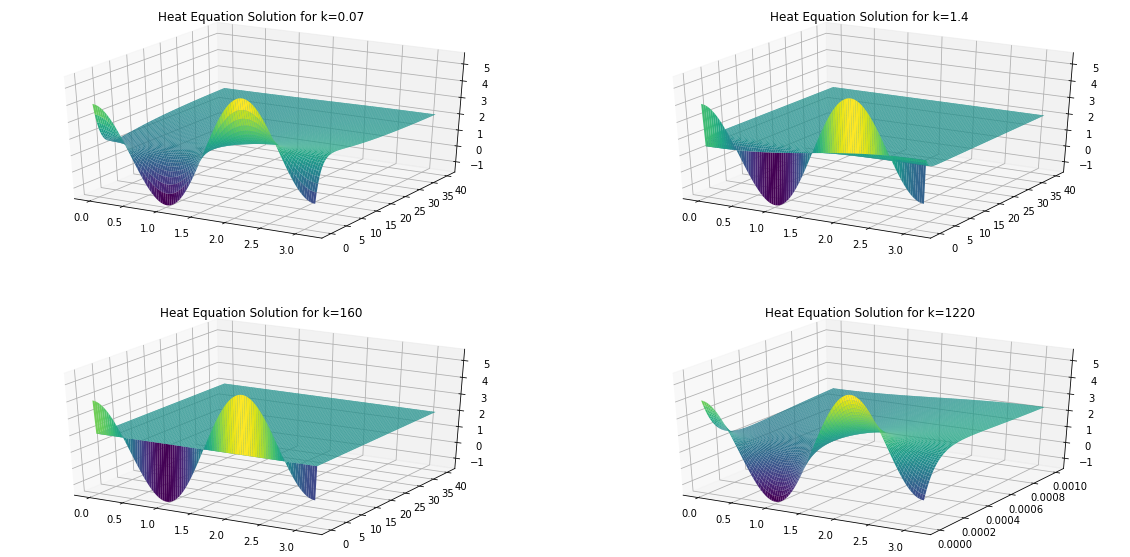

In [5]:
# YOUR CODE HERE

def f(x, t, L=numpy.pi):
    return 2 - numpy.cos(numpy.pi*x/L)*numpy.exp(-(numpy.pi/L)**2*(k*t)) + 3*numpy.cos(3*numpy.pi*x/L)*numpy.exp(-(3*numpy.pi/L)**2*(k*t))

fig = plt.figure(figsize=(20,10))

#Plot for k = 0.07
k = 0.07
x = numpy.linspace(0, numpy.pi, 100)
t = numpy.linspace(0, 40, 100)
X, T = numpy.meshgrid(x, t)
Z = f(X, T) #0.07 is the thermal diffusivity of alcohol
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot_surface(X, T, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('Heat Equation Solution for k='+str(k))

#Plot for k = 1.4
k=1.4
x = numpy.linspace(0, numpy.pi, 100)
t = numpy.linspace(0, 40, 100)
X, T = numpy.meshgrid(x, t)
Z = f(X, T) #1.4 is the thermal diffusivity of quartz
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.plot_surface(X, T, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('Heat Equation Solution for k='+str(k))

#Plot for k = 160
k=160
x = numpy.linspace(0, numpy.pi, 100)
t = numpy.linspace(0, 40, 100)
X, T = numpy.meshgrid(x, t)
Z = f(X, T) #160 is the thermal diffusivity of Oxygen
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.plot_surface(X, T, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('Heat Equation Solution for k='+str(k))

#Plot for k = 1220
k=1220
x = numpy.linspace(0, numpy.pi, 100)
t = numpy.linspace(0, 0.001, 100)
X, T = numpy.meshgrid(x, t)
Z = f(X, T) #1220 is the thermal diffusivity of pyrolytic graphite
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.plot_surface(X, T, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('Heat Equation Solution for k='+str(k))

# Remark

The first three plots were in the interval $0\leq t \leq 40$ except the last one in the bottom right which is in the interval $0 \leq t \leq 0.001$. This is to demonstrate that materials with low $k$ takes longer to reach steady state and materials with higher $k$ reaches steady state very fast. And the plots seem to agree with our steady state as time goes to infinity.

**(b)** [15] Solve the PDE $u_t + \left(\frac{1}{2}u^2\right)_x = 0$ where $x \in \Omega = \mathbb R$ and the initial conditions
$$ 
    u(x,0) = \left \{ \begin{aligned}
        1 & & x \leq 0 \\
        2 & & x > 0
    \end{aligned} \right .
$$
In addition to plotting the solution also mark the edges of interesting regions such as the rarefaction fan or the shock.

### Solution

By MOC: transforming the PDE into an ODE along the appropriate curve, and applying chain rule gives us:
$$
\frac{du}{dt} = \frac{\partial u}{\partial t} + \frac{dx}{dt}\frac{\partial u}{\partial x}
$$

We then get from this that: $\frac{du}{dt}=0$ and $\frac{dx}{dt}=u$.

Solving yields:

$$
u(x,t) = u(x,0)
$$

And:

$$
x(t) = ut + x_0
$$

which is $t+x_0$ for $x\leq 0$ and $2t+x_0$ for $x>0$.

In [6]:
# YOUR CODE HERE